Project Description
The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

The chemical compositions are measured as the weight percent in corresponding oxide.
Attribute Information-
1.	 Id number: 1 to 214
2.	 RI: refractive index
3.	Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4.	Mg: Magnesium
5.	Al: Aluminum
6.	Si: Silicon
7.	K: Potassium
8.	Ca: Calcium
9.	Ba: Barium
10.	Fe: Iron
11.	Type of glass: (class attribute)
•	1- building_windows_float_processed
•	2- building_windows_non_float_processed
•	3- vehicle_windows_float_processed
•	4- vehicle_windows_non_float_processed (none in this database)
•	5- containers
•	6- tableware
•	7- headlamps
There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 
Predict : Type of glass


In [1]:
import pandas as pd
import numpy as np                           # Importing Necessary Libraries.
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')             

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv')
df.head(5)                                    # Importing the Data Set.

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [4]:
df1=df.rename(columns={'1':'Id_Number','1.52101':'Refrative_index','13.64':'Sodium','4.49':'Magnesium','1.10':'Aluminium',
                      '71.78':'Silicon','0.06':'Potassium','8.75':'Calcium','0.00':'Barium','0.00.1':'Iron','1.1':'TypeofGlass'})
df1                     # Since the Dataset column is not correct,copying the dataset and rename the column correctly. 

,Id_Number,Refrative_index,Sodium,Magnesium,Aluminium,Silicon,Potassium,Calcium,Barium,Iron,TypeofGlass
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [5]:
df1.shape   # checking the Shape of the Dataset

(213, 11)

In [6]:
# To Check the Null Values.
df1.isnull().sum()

Id_Number          0
Refrative_index    0
Sodium             0
Magnesium          0
Aluminium          0
Silicon            0
Potassium          0
Calcium            0
Barium             0
Iron               0
TypeofGlass        0
dtype: int64

In [7]:
# Observation:
# There is No Null Values Present.
# Type of Glass is Target Variable.


In [8]:
df1.dtypes    # To Check the DataType:

Id_Number            int64
Refrative_index    float64
Sodium             float64
Magnesium          float64
Aluminium          float64
Silicon            float64
Potassium          float64
Calcium            float64
Barium             float64
Iron               float64
TypeofGlass          int64
dtype: object

In [9]:
# Observations:
# Id_ Number is in Int and remaining all float values ,so we can go ahead,as we dont have any object values.


In [10]:
# To Check all the Columns:
df1.columns

Index(['Id_Number', 'Refrative_index', 'Sodium', 'Magnesium', 'Aluminium',
       'Silicon', 'Potassium', 'Calcium', 'Barium', 'Iron', 'TypeofGlass'],
      dtype='object')

In [11]:
df1.info() # To Get the information about the Dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id_Number        213 non-null    int64  
 1   Refrative_index  213 non-null    float64
 2   Sodium           213 non-null    float64
 3   Magnesium        213 non-null    float64
 4   Aluminium        213 non-null    float64
 5   Silicon          213 non-null    float64
 6   Potassium        213 non-null    float64
 7   Calcium          213 non-null    float64
 8   Barium           213 non-null    float64
 9   Iron             213 non-null    float64
 10  TypeofGlass      213 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.4 KB


    Target Column Update.

In [12]:
df1['TypeofGlass'].value_counts()   # To Check the Target Variable output

2    76
1    69
7    29
3    17
5    13
6     9
Name: TypeofGlass, dtype: int64

In [13]:
# Observations:

# As per the Below Category, 
#1.We Have 1-69 Building Windows float Processed Glass 
#2.We Have 2-76 Building Windows-Non-Float Processed Glass
#3.We have 3-17 Vechicle windows_float_processes Glass.
#4. We have 4-0 (No Vechicle_windows_non _float_processed Glass)
#5.we have 5-13,(Container type Glasses)
#6. we Have 6-9,(Tableware Glasses are there)
#7. we Have 7-29(Headlamps Glasses are there)
  
    
# Glasses of class Type 1-4  are  WINDOW GLASS
# Glasses of class Type 5-7  are NON WINDOW GLASS.
 
# Replacing the same in the Target Variable.





In [14]:
# we will replace window Glass as 0 and Non window Glass as 1. in TargetVariable.

df1['TypeofGlass']=df1['TypeofGlass'].replace(1,0)



In [15]:
df1['TypeofGlass']=df1['TypeofGlass'].replace(2,0)
df1['TypeofGlass']=df1['TypeofGlass'].replace(3,0)
df1['TypeofGlass']=df1['TypeofGlass'].replace(5,1)
df1['TypeofGlass']=df1['TypeofGlass'].replace(6,1)
df1['TypeofGlass']=df1['TypeofGlass'].replace(7,1)


In [16]:
df1['TypeofGlass'].value_counts() # To Recheck all the values are replaced .

0    162
1     51
Name: TypeofGlass, dtype: int64

In [17]:
# Observations: 
# Target Variable are converted into category(0 & 1,however it is not balanced),we will do it shortly.

In [18]:
df1 # Rechecking the DataSet,Same 213 rows and 11 columns.

,Id_Number,Refrative_index,Sodium,Magnesium,Aluminium,Silicon,Potassium,Calcium,Barium,Iron,TypeofGlass
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,0
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,0
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,0
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,0
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,0
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,1
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,1
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,1
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,1


In [19]:
# To Check Any Duplicate Values are present:
df1.drop_duplicates(inplace=True)
df1

,Id_Number,Refrative_index,Sodium,Magnesium,Aluminium,Silicon,Potassium,Calcium,Barium,Iron,TypeofGlass
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,0
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,0
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,0
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,0
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,0
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,1
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,1
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,1
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,1


In [20]:
# Observation:
#No duplicate values present in the column and the dataset remains in same datashape.(213rows * 11columns.)

In [21]:
df1.describe()

,Id_Number,Refrative_index,Sodium,Magnesium,Aluminium,Silicon,Potassium,Calcium,Barium,Iron,TypeofGlass
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,108.000000,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,0.239437
std,61.631972,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,0.427745
min,2.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,0.000000
25%,55.000000,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,0.000000
50%,108.000000,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,0.000000
75%,161.000000,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,0.000000
max,214.000000,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,1.000000


In [22]:
# Observations:
#1.count remains same in all the columns.
#2.standard deviation value looks good ,except the Id_number(which is nominal data)
#3. we will visualize further to see how the datasetlooks like
#4. As per my observations,there is no outliers
#5. I can see skewness in few colums,in EDA we will observe more.

                                 SEGREGATING THE COLUMNS FOR THE BETTER EDA

In [23]:
df1_nominal=df1[['Id_Number','Refrative_index']].copy()
df1_nominal

,Id_Number,Refrative_index
0,2,1.51761
1,3,1.51618
2,4,1.51766
3,5,1.51742
4,6,1.51596
...,...,...
208,210,1.51623
209,211,1.51685
210,212,1.52065
211,213,1.51651


In [24]:
df1_continous=df1[['Sodium','Magnesium','Aluminium','Silicon','Potassium','Calcium','Barium','Iron']].copy()

In [25]:
df1_continous

,Sodium,Magnesium,Aluminium,Silicon,Potassium,Calcium,Barium,Iron
0,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00
1,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00
2,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00
3,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00
4,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26
...,...,...,...,...,...,...,...,...
208,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00
209,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00
210,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00
211,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00


In [26]:
 # we will see the Visualiztion of the continous columns.
    

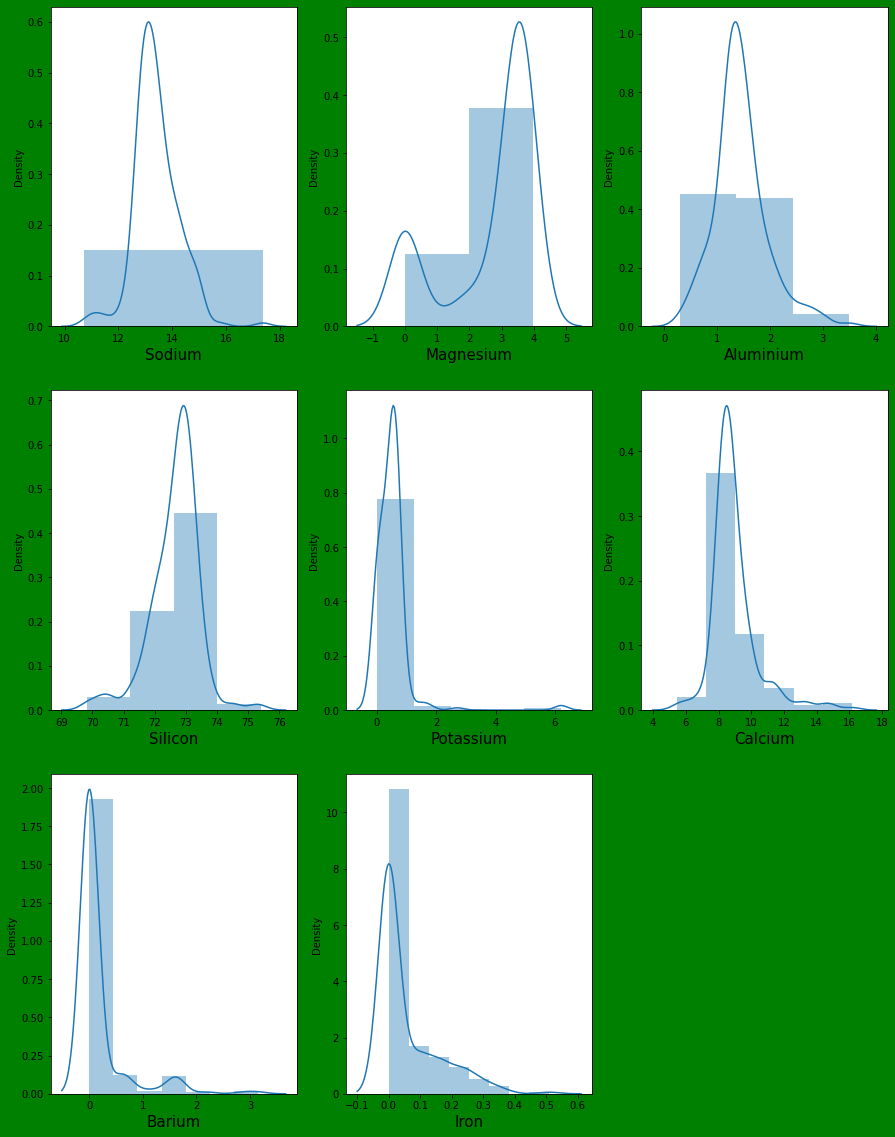

In [27]:
plt.figure(figsize=(15,20),facecolor='green')
plotnumber=1
for column in df1_continous:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df1_continous[column],plotnumber)
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

In [28]:
# Observations:
#1.Sodium is Normally distributed(skewness both side also present.)
# 2. Features with right skewness:'Aluminium'.'Potassium','Calcium','Barium','Iron')
#3. Features with Left skewness: 'Magnesium','Silicon','Calcium')

In [29]:
Target=df1['TypeofGlass'] # Segregating the Target Variable.

In [30]:
# we will see how the  dataset is having the relationship with Target Variable.

In [31]:
features=df1.drop(columns='TypeofGlass',axis=1) # Segregating the Features
features
    

,Id_Number,Refrative_index,Sodium,Magnesium,Aluminium,Silicon,Potassium,Calcium,Barium,Iron
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26
...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00


In [32]:
Target # Segregating the output

0      0
1      0
2      0
3      0
4      0
      ..
208    1
209    1
210    1
211    1
212    1
Name: TypeofGlass, Length: 213, dtype: int64

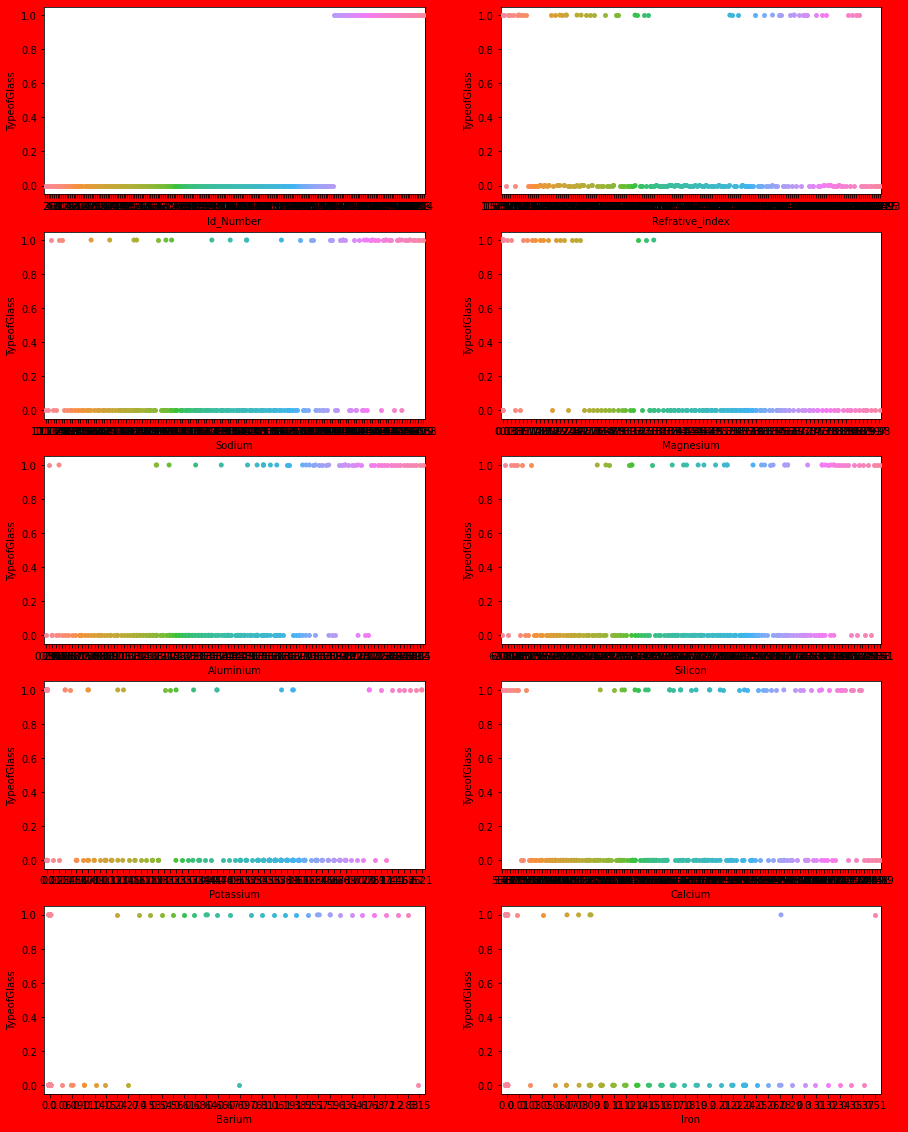

In [33]:
plt.figure(figsize=(15,20),facecolor='red')
plotnumber=1
for column in features:
    if plotnumber<=10:
        plt.subplot(5,2,plotnumber)
        ax=sns.stripplot(y=Target,x=features[column])
    plotnumber+=1
plt.show()

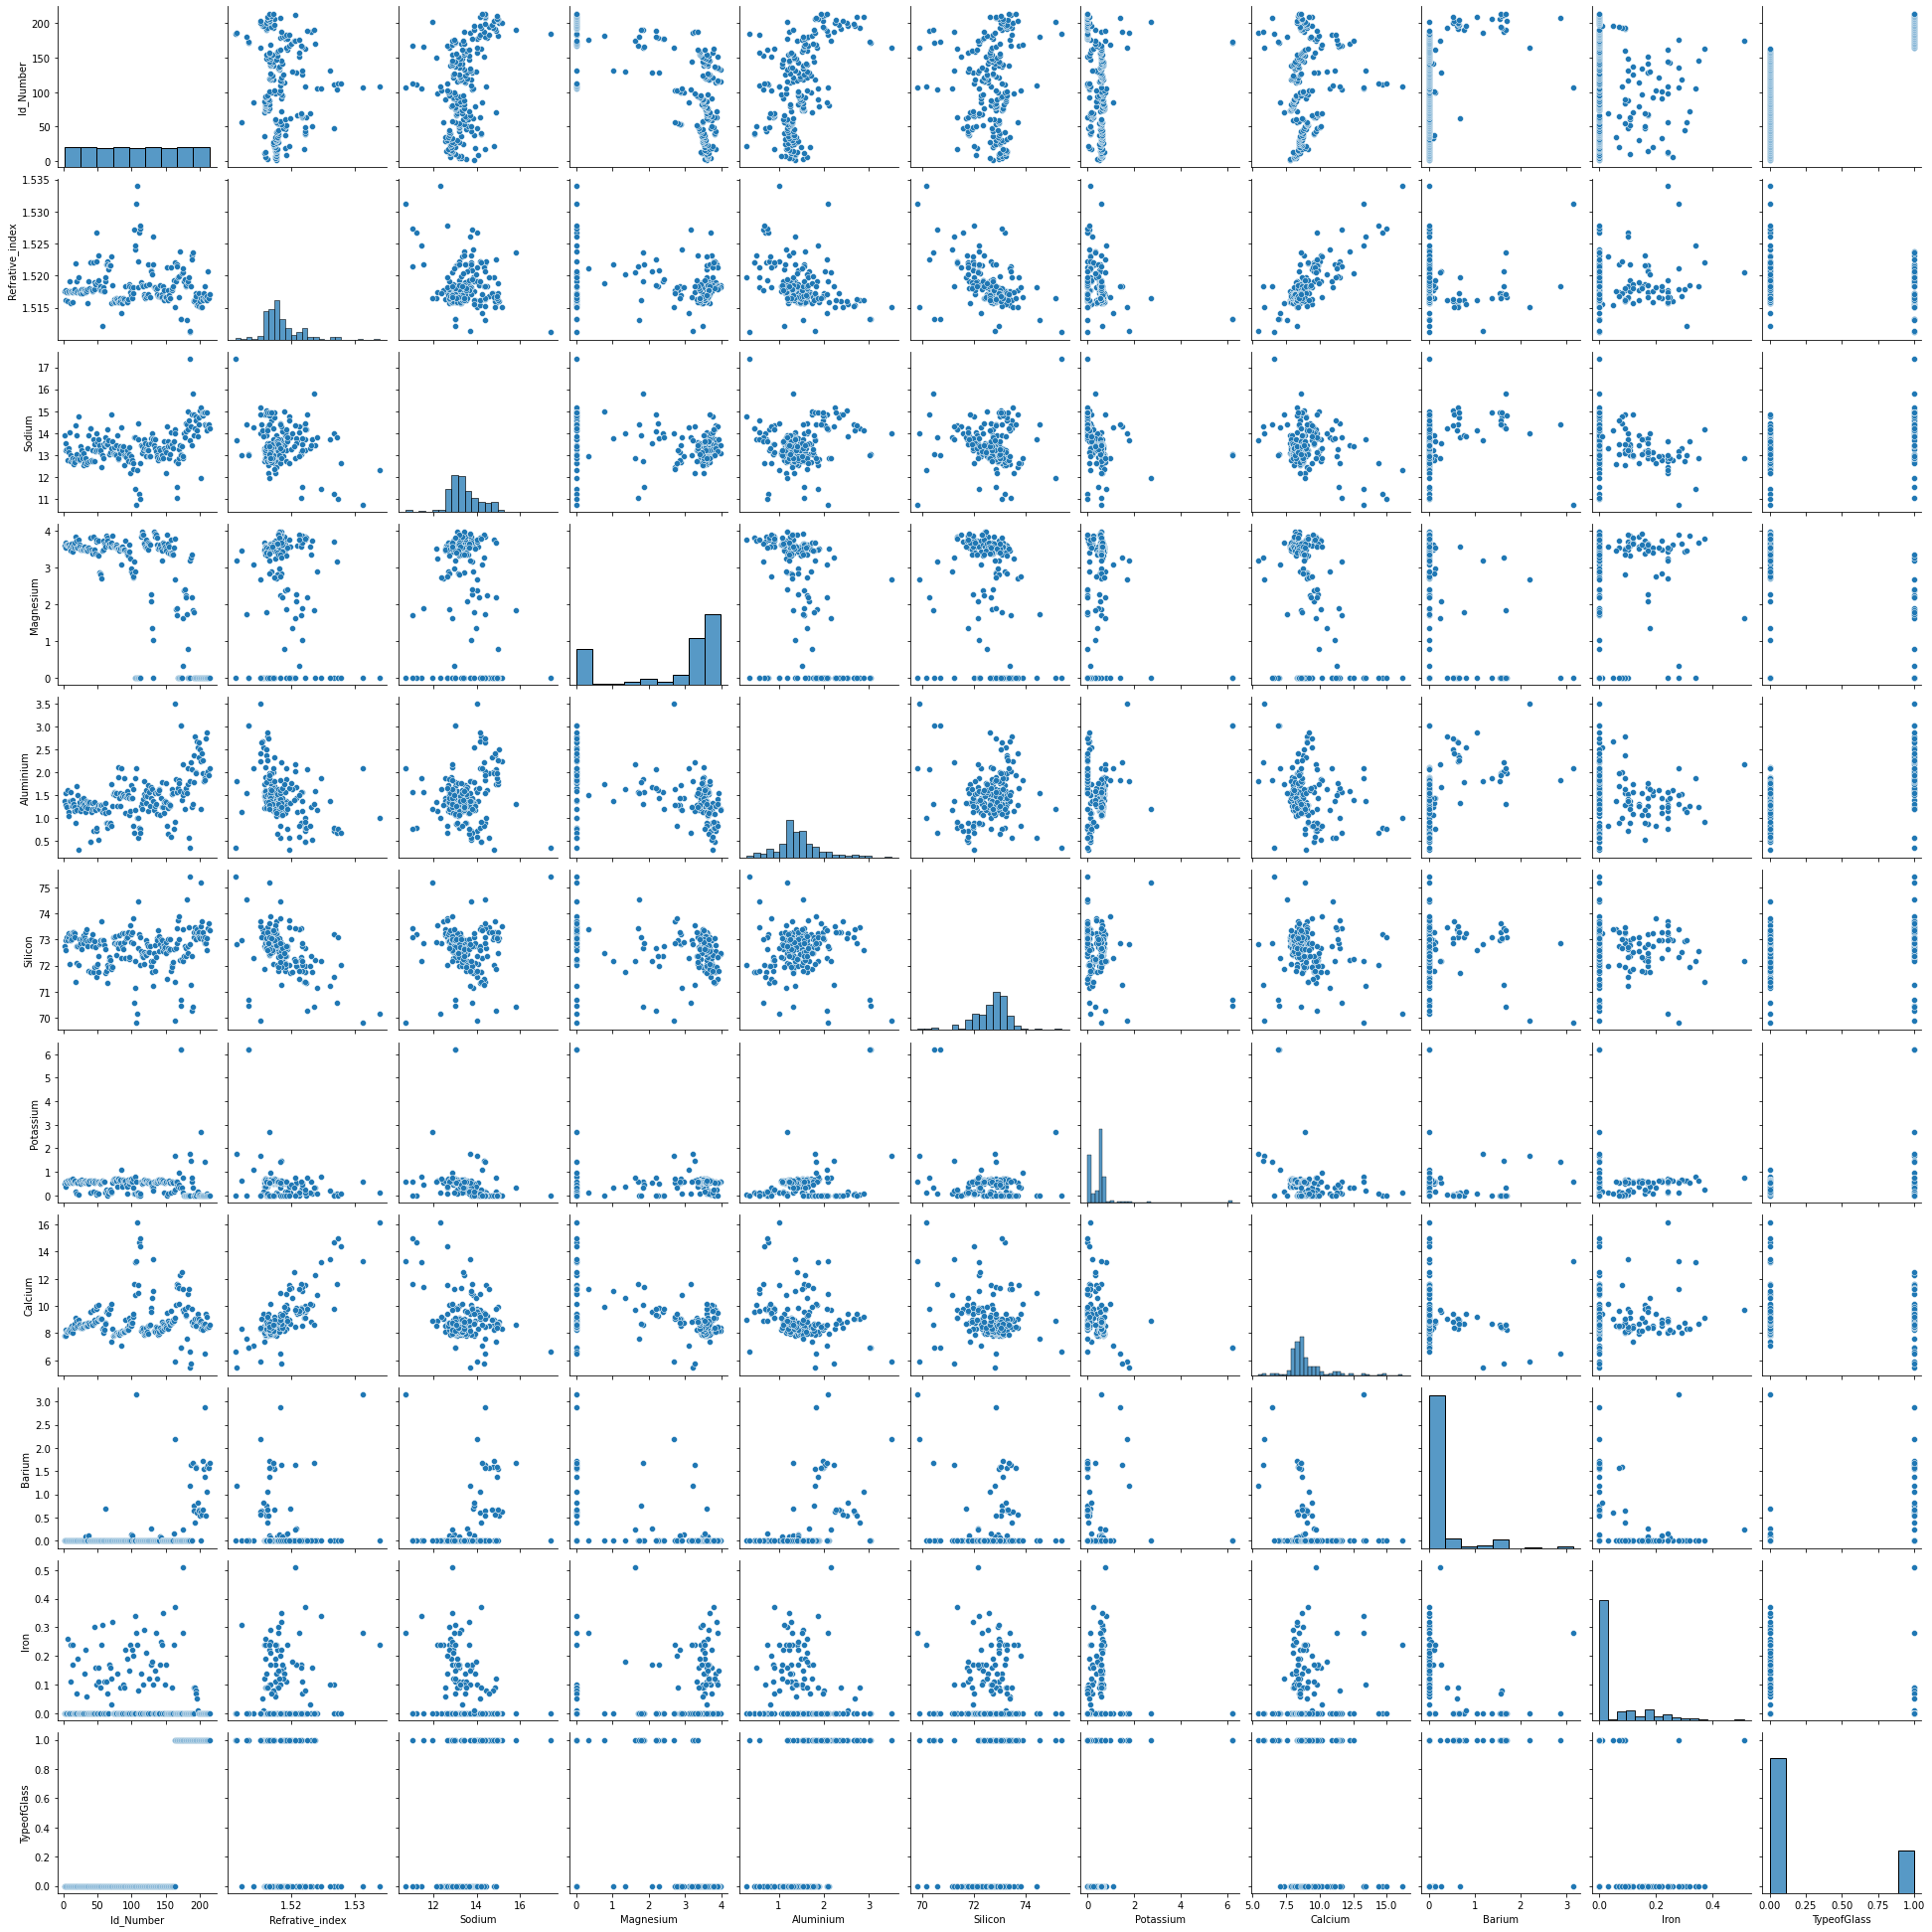

In [34]:
sns.pairplot(df1)

0    162
1     51
Name: TypeofGlass, dtype: int64


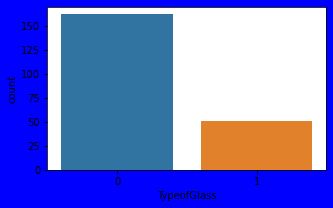

In [35]:
plt.figure(figsize=(5,3),facecolor='blue')
print(df1['TypeofGlass'].value_counts())
sns.countplot(df1['TypeofGlass'])
plt.show()

In [36]:
#observation :
# 162 values are for window glas
# 51 values are for Non Window Glass.

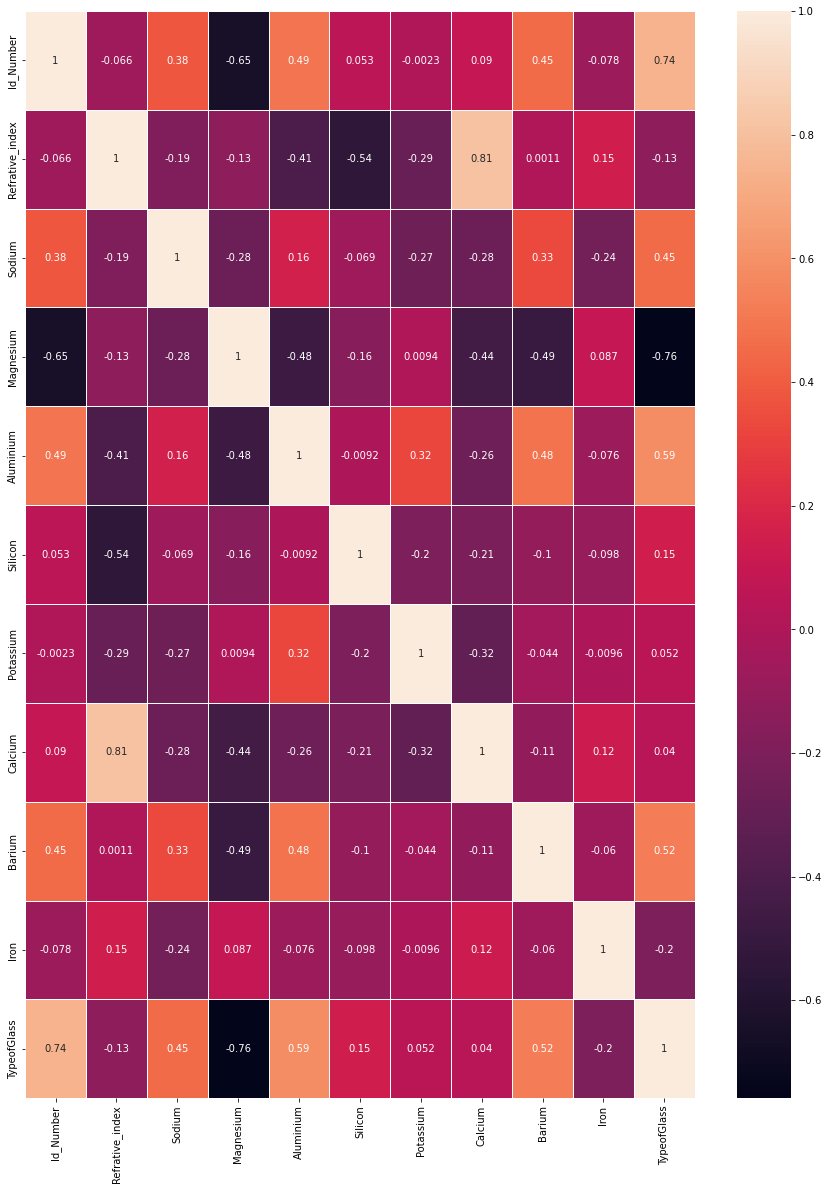

In [37]:
corr=df1.corr()   # we will see the relationship between each features using heatmap.
plt.figure(figsize=(15,20))
sns.heatmap(data=corr,annot=True,linewidths=0.5)
plt.show()

In [38]:
corr['TypeofGlass'].sort_values(ascending=False)

TypeofGlass        1.000000
Id_Number          0.739143
Aluminium          0.585198
Barium             0.523014
Sodium             0.453504
Silicon            0.145654
Potassium          0.052104
Calcium            0.040319
Refrative_index   -0.132368
Iron              -0.196747
Magnesium         -0.758357
Name: TypeofGlass, dtype: float64

In [39]:
# Observations:

# we can see Id_Number,'Aluminium','Barium ','Sodium '.'Magnesium'  are having strong bond with Target Variable.
# Potassium and Calcium are having less bond with Target Variable.
# 'Silicon','Refrative index and 'Iron are having medium bond with Target.



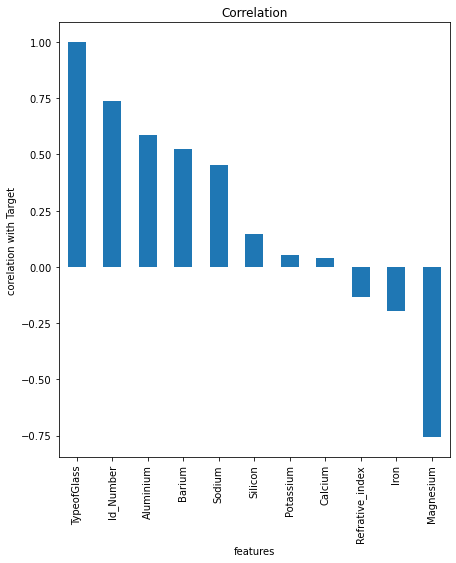

In [40]:
plt.figure(figsize=(7,8))
corr['TypeofGlass'].sort_values(ascending=False).plot(kind='bar')
plt.xlabel('features')
plt.ylabel('corelation with Target')
plt.title('Correlation')
plt.show()


                              SMOTE FOR TARGETVARIABLE.                            

In [42]:
  # Checking the Outliers. Using Box PLot

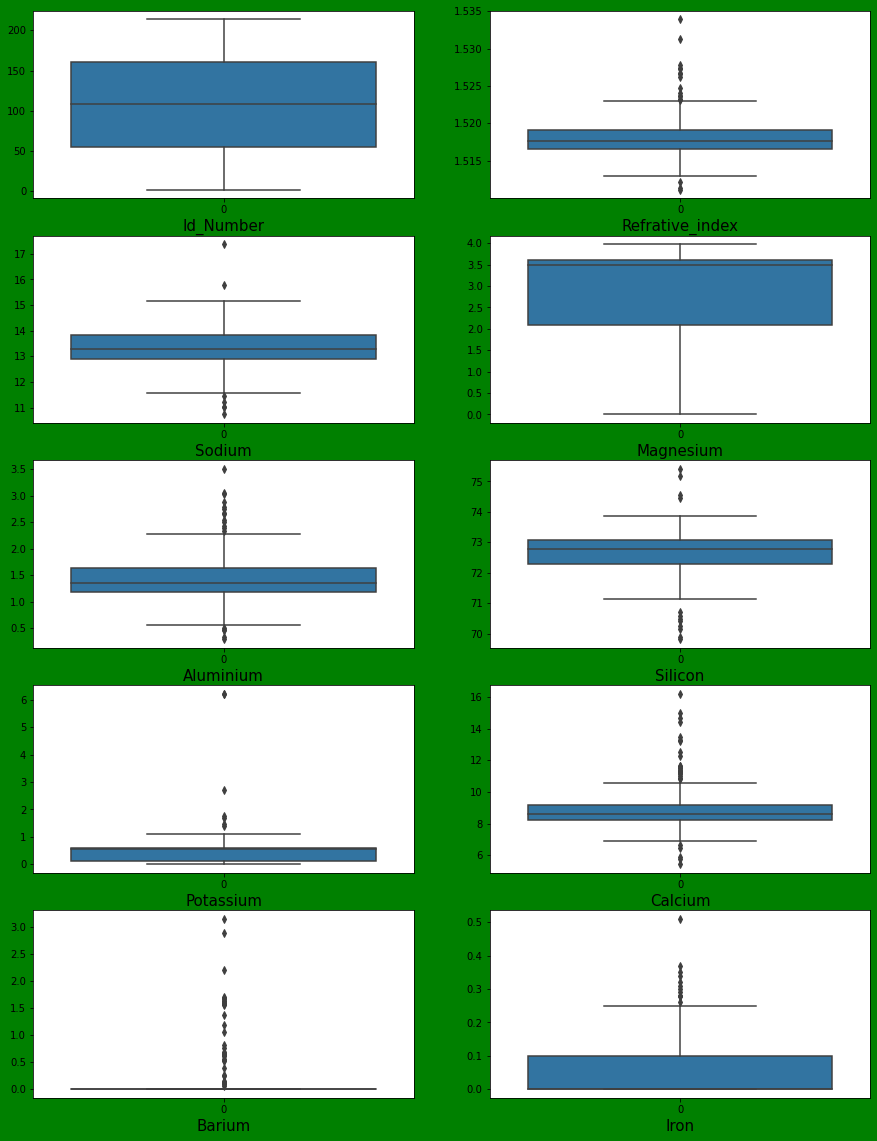

In [61]:
plt.figure(figsize=(15,20),facecolor='green')
graph=1
for column in features:
    if graph<=10:
        plt.subplot(5,2,graph)
        ax=sns.boxplot(data=features[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

In [43]:
# Importing Zscore                 

In [44]:
from scipy.stats import zscore

In [45]:
z=np.abs(zscore(df1))   # Applying Zscore to remove outliers.
z

,Id_Number,Refrative_index,Sodium,Magnesium,Aluminium,Silicon,Potassium,Calcium,Barium,Iron,TypeofGlass
0,1.723938,0.245101,0.591880,0.642937,0.173500,0.097091,0.029329,0.792599,0.353808,0.588301,0.561084
1,1.707675,0.716826,0.150946,0.608144,0.187433,0.433777,0.167472,0.827734,0.353808,0.588301,0.561084
2,1.691411,0.228607,0.240996,0.705564,0.313863,0.058303,0.108813,0.518546,0.353808,0.588301,0.561084
3,1.675147,0.307777,0.167507,0.656854,0.414122,0.550322,0.078115,0.623951,0.353808,0.588301,0.561084
4,1.658884,0.789399,0.755419,0.649895,0.347848,0.407878,0.216258,0.623951,0.353808,2.082200,0.561084
...,...,...,...,...,...,...,...,...,...,...,...
208,1.658884,0.700332,0.898085,1.862164,2.874379,0.058303,0.643296,0.156046,1.778672,0.588301,1.782266
209,1.675147,0.495808,1.853443,1.862164,1.089766,0.524423,0.766090,0.392060,2.844912,0.588301,1.782266
210,1.691411,0.757727,1.167545,1.862164,1.149921,0.990604,0.766090,0.363952,2.945501,0.588301,1.782266
211,1.707675,0.607966,1.192041,1.862164,0.989506,1.236644,0.766090,0.335844,2.804676,0.588301,1.782266


In [47]:
df1_new=df1[(z<3).all(axis=1)]
df1_new

,Id_Number,Refrative_index,Sodium,Magnesium,Aluminium,Silicon,Potassium,Calcium,Barium,Iron,TypeofGlass
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,0
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,0
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,0
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,0
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,0
...,...,...,...,...,...,...,...,...,...,...,...
207,209,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.00,1
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,1
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,1
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,1


In [48]:
x=df1_new.drop(['TypeofGlass'],axis=1)    
x

,Id_Number,Refrative_index,Sodium,Magnesium,Aluminium,Silicon,Potassium,Calcium,Barium,Iron
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26
...,...,...,...,...,...,...,...,...,...,...
207,209,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.00
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00


In [49]:
y=df1_new['TypeofGlass']
y

0      0
1      0
2      0
3      0
4      0
      ..
207    1
208    1
209    1
210    1
211    1
Name: TypeofGlass, Length: 193, dtype: int64

                                        SMOTE FOR CLASSIFICATION.

In [50]:
y.value_counts()

0    153
1     40
Name: TypeofGlass, dtype: int64

In [51]:
from imblearn.over_sampling import SMOTE

In [58]:
sm=SMOTE()
x,y=sm.fit_resample(x,y)

In [60]:
y.value_counts()  # rechecking the Target Variable after resampling.

0    153
1    153
Name: TypeofGlass, dtype: int64

In [63]:
x.shape # Rechecking the feature data shape.

(306, 10)

                                                     PREPROCESSING

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
scaler=StandardScaler()

In [66]:
x_scaled=scaler.fit_transform(x)
x_scaled

array([[-2.06349765, -0.22169112,  0.32741249, ..., -1.10256427,
        -0.53256749, -0.51868464],
       [-2.04783601, -0.8592686 , -0.12386696, ..., -1.14405188,
        -0.53256749, -0.51868464],
       [-2.03217437, -0.1993982 , -0.52500425, ..., -0.77896088,
        -0.53256749, -0.51868464],
       ...,
       [ 1.19412316, -0.3485591 ,  0.70915075, ..., -0.13457651,
         1.99093787, -0.51868464],
       [ 0.83390548,  1.08820735,  0.3650785 , ..., -1.64882794,
         1.3314844 , -0.51868464],
       [ 1.19412316, -0.61865565,  1.41302382, ..., -0.49354829,
         2.56709538, -0.51868464]])

In [67]:
df1_new.skew() 

Id_Number          0.107364
Refrative_index    0.971729
Sodium             0.375857
Magnesium         -1.533664
Aluminium          0.649917
Silicon           -0.436288
Potassium          0.297900
Calcium            1.074092
Barium             3.178256
Iron               1.478611
TypeofGlass        1.455790
dtype: float64

                                             PCA

In [70]:
from sklearn.decomposition import PCA

In [71]:
pca=PCA()
pca.fit_transform(X)

array([[-1.82791771e+00,  1.21608545e+00,  5.40677376e-01, ...,
         3.59834152e-01,  5.53867642e-02, -1.13182060e-16],
       [-1.63430452e+00,  1.24412829e+00, -2.14173926e-02, ...,
        -1.19572297e-01,  1.98297761e-01, -2.60459582e-17],
       [-2.32696488e+00,  7.12201700e-01,  1.90624000e-01, ...,
         2.52166583e-02,  1.38413338e-01,  6.97383831e-18],
       ...,
       [ 3.19610398e+00,  2.90207926e-01,  7.06367177e-02, ...,
        -5.59279584e-01,  1.21459350e-01,  2.36099030e-18],
       [-1.90837973e-01,  2.44986101e+00,  8.53900528e-01, ...,
         4.09881375e-01, -2.51057082e-01, -2.76905816e-16],
       [ 3.25584329e+00,  5.82486289e-01,  5.50851845e-01, ...,
        -5.36570776e-03,  1.40293093e-01,  3.37478641e-17]])

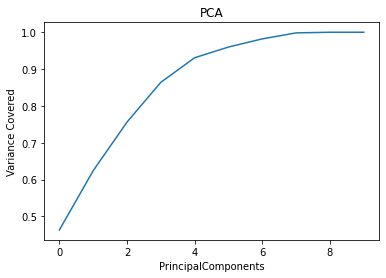

In [72]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('PrincipalComponents')
plt.ylabel('Variance Covered')
plt.title('PCA')
plt.show()

In [73]:
# Observation:
# By using Spreeplot,felt that we can choose components=7 to see data variance fully.

In [74]:
pca=PCA(n_components=7)                      # To See The Best Seven Components 
new_pca=pca.fit_transform(X)
comp=pd.DataFrame(new_pca,columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7'])
comp

,pc1,pc2,pc3,pc4,pc5,pc6,pc7
0,-1.827918,1.216085,0.540677,0.951639,0.770468,-0.766262,-0.559831
1,-1.634305,1.244128,-0.021417,0.919322,0.958510,-0.763236,-0.723259
2,-2.326965,0.712202,0.190624,0.893381,0.354028,-0.851940,-0.202946
3,-2.132812,0.895749,-0.333733,0.878927,1.009976,-0.695668,-0.161203
4,-2.366845,1.546275,-0.924567,-1.378447,-0.050720,-0.657760,-0.618776
...,...,...,...,...,...,...,...
301,0.429276,-2.161993,-0.786375,0.252630,-0.680627,-0.208716,-0.106061
302,3.075232,0.755224,-0.912028,-1.271800,-0.380661,-0.307539,-0.291397
303,3.196104,0.290208,0.070637,0.492046,-0.923835,-0.440219,0.024531
304,-0.190838,2.449861,0.853901,1.540346,-2.333969,0.354263,1.277287


In [75]:
# splitting the Model into Train_test_split

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [77]:
# To select Random state,and to find where the accuracy rate is high.

In [78]:
lr=LogisticRegression()
for i in range(0,1000):
    x_train,x_test,y_train,y_test=train_test_split(comp,y,test_size=0.25)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100)==round(accuracy_score(y_test,pred_test)*100):
        print("The Model Performs well")
        print("At Random State",i)
        print("The Training score is:",accuracy_score(y_train,pred_train)*100)
        print("The Test Score is :",accuracy_score(y_test,pred_test)*100)
    


The Model Performs well
At Random State 1
The Training score is: 99.12663755458514
The Test Score is : 98.7012987012987
The Model Performs well
At Random State 2
The Training score is: 99.12663755458514
The Test Score is : 98.7012987012987
The Model Performs well
At Random State 4
The Training score is: 99.12663755458514
The Test Score is : 98.7012987012987
The Model Performs well
At Random State 8
The Training score is: 98.68995633187772
The Test Score is : 98.7012987012987
The Model Performs well
At Random State 10
The Training score is: 99.56331877729258
The Test Score is : 100.0
The Model Performs well
At Random State 14
The Training score is: 99.56331877729258
The Test Score is : 100.0
The Model Performs well
At Random State 16
The Training score is: 98.68995633187772
The Test Score is : 98.7012987012987
The Model Performs well
At Random State 18
The Training score is: 99.56331877729258
The Test Score is : 100.0
The Model Performs well
At Random State 19
The Training score is: 98.

In [97]:
# Choosing the Random state 500

In [79]:
lr=LogisticRegression()
x_train,x_test,y_train,y_test=train_test_split(comp,y,test_size=0.25,random_state=500)
    

In [80]:
lr.fit(x_train,y_train)

LogisticRegression()

In [87]:
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)
accuracy_score(y_test,pred_test)

0.987012987012987

                                             CROSS VAL SCORE.

In [82]:
from sklearn.model_selection import cross_val_score

In [85]:
for j in range(2,10):
    lss_score=cross_val_score(lr,X,y,cv=j)
    print(lss_score)
    lsc_score=lss_score.mean()
    print("At CV Fold,:",j)
    print("Cross Valid Score is:",lsc_score*100)
    print("Accuracy Score is :",accuracy_score(y_test,pred_test)*100)
    

[0.98039216 0.90196078]
At CV Fold,: 2
Cross Valid Score is: 94.11764705882352
Accuracy Score is : 98.7012987012987
[0.97058824 1.         0.91176471]
At CV Fold,: 3
Cross Valid Score is: 96.07843137254902
Accuracy Score is : 98.7012987012987
[0.96103896 1.         0.97368421 0.96052632]
At CV Fold,: 4
Cross Valid Score is: 97.38123718386878
Accuracy Score is : 98.7012987012987
[0.9516129  1.         1.         0.93442623 0.95081967]
At CV Fold,: 5
Cross Valid Score is: 96.737176097303
Accuracy Score is : 98.7012987012987
[0.94117647 1.         1.         1.         0.88235294 0.98039216]
At CV Fold,: 6
Cross Valid Score is: 96.73202614379086
Accuracy Score is : 98.7012987012987
[0.93181818 1.         1.         1.         0.97727273 0.95348837
 0.97674419]
At CV Fold,: 7
Cross Valid Score is: 97.70462096043492
Accuracy Score is : 98.7012987012987
[0.94871795 0.97435897 1.         1.         1.         0.94736842
 0.97368421 1.        ]
At CV Fold,: 8
Cross Valid Score is: 98.051619433

In [86]:
# Observation:
# Choosing Cross Fold,cv=9 where Cross Valid Score and Accuracy Score is having less difference.

In [90]:
print("The Cross Valid Score is :",lsc_score*100)
print("The Training Score for lr is ",accuracy_score(y_train,pred_train)*100)
print("The Accuracy Score for lr is :",accuracy_score(y_test,pred_test)*100)
print ("The Difference between the Score is ",(lsc_score*100-accuracy_score(y_test,pred_test)*100))

The Cross Valid Score is : 98.03921568627452
The Training Score for lr is  98.68995633187772
The Accuracy Score for lr is : 98.7012987012987
The Difference between the Score is  -0.6620830150241801


In [91]:
def model_selection(algorithm,x_train,x_test,y_train,y_test):
    algorithm.fit(x_train,y_train)
    pred_algo_train=algorithm.predict(x_train)
    pred_algo_test=algorithm.predict(x_test)
    cvs=cross_val_score(algorithm,X,y,cv=9)
    cvc=cvs.mean()
    print("The Accuracy score of the Model Training Data:",accuracy_score(y_train,pred_algo_train)*100)
    print("The Accuracy score of the Model Test Data:",accuracy_score(y_test,pred_algo_test)*100)
    print("The Cross Valid Score of the Algorithm:",cvc*100)
    print("The Classification report of the Model is :",classification_report(y_test,pred_algo_test))
    print("The Confusion Matrix is :",confusion_matrix(y_test,pred_algo_test))
    print("The Difference between Cross Val score and Accuracy score is: ",(cvc*100-accuracy_score(y_test,pred_algo_test)*100))
    

                                    Training the Model With Different Algorithms.

In [92]:
# Training the Model with Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [93]:
dt=DecisionTreeClassifier()

In [94]:
model_selection(dt,x_train,x_test,y_train,y_test)

The Accuracy score of the Model Training Data: 100.0
The Accuracy score of the Model Test Data: 97.40259740259741
The Cross Valid Score of the Algorithm: 97.38562091503269
The Classification report of the Model is :               precision    recall  f1-score   support

           0       1.00      0.95      0.97        40
           1       0.95      1.00      0.97        37

    accuracy                           0.97        77
   macro avg       0.97      0.97      0.97        77
weighted avg       0.98      0.97      0.97        77

The Confusion Matrix is : [[38  2]
 [ 0 37]]
The Difference between Cross Val score and Accuracy score is:  -0.016976487564718923


In [95]:
# Training the Model with SVM Classifier

In [96]:
from sklearn.svm import  SVC

In [97]:
svc=SVC()

In [98]:
model_selection(svc,x_train,x_test,y_train,y_test)

The Accuracy score of the Model Training Data: 98.2532751091703
The Accuracy score of the Model Test Data: 98.7012987012987
The Cross Valid Score of the Algorithm: 98.03921568627452
The Classification report of the Model is :               precision    recall  f1-score   support

           0       1.00      0.97      0.99        40
           1       0.97      1.00      0.99        37

    accuracy                           0.99        77
   macro avg       0.99      0.99      0.99        77
weighted avg       0.99      0.99      0.99        77

The Confusion Matrix is : [[39  1]
 [ 0 37]]
The Difference between Cross Val score and Accuracy score is:  -0.6620830150241801


In [99]:
# Training the Model with K Neighbor Classifier.

In [101]:
from sklearn.neighbors import KNeighborsClassifier

In [102]:
knc=KNeighborsClassifier()

In [103]:
model_selection(knc,x_train,x_test,y_train,y_test)

The Accuracy score of the Model Training Data: 98.2532751091703
The Accuracy score of the Model Test Data: 97.40259740259741
The Cross Valid Score of the Algorithm: 96.73202614379083
The Classification report of the Model is :               precision    recall  f1-score   support

           0       0.97      0.97      0.97        40
           1       0.97      0.97      0.97        37

    accuracy                           0.97        77
   macro avg       0.97      0.97      0.97        77
weighted avg       0.97      0.97      0.97        77

The Confusion Matrix is : [[39  1]
 [ 1 36]]
The Difference between Cross Val score and Accuracy score is:  -0.6705712588065751


In [104]:
# Training the Model with Ensemble Techniques.


In [106]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [107]:
rf=RandomForestClassifier()
gbc=GradientBoostingClassifier()
ada=AdaBoostClassifier()
xgb=XGBClassifier()

In [109]:
model_selection(rf,x_train,x_test,y_train,y_test)

model_selection(gbc,x_train,x_test,y_train,y_test)

model_selection(ada,x_train,x_test,y_train,y_test)

model_selection(xgb,x_train,x_test,y_train,y_test)

The Accuracy score of the Model Training Data: 100.0
The Accuracy score of the Model Test Data: 97.40259740259741
The Cross Valid Score of the Algorithm: 99.67320261437908
The Classification report of the Model is :               precision    recall  f1-score   support

           0       1.00      0.95      0.97        40
           1       0.95      1.00      0.97        37

    accuracy                           0.97        77
   macro avg       0.97      0.97      0.97        77
weighted avg       0.98      0.97      0.97        77

The Confusion Matrix is : [[38  2]
 [ 0 37]]
The Difference between Cross Val score and Accuracy score is:  2.270605211781671
The Accuracy score of the Model Training Data: 100.0
The Accuracy score of the Model Test Data: 93.5064935064935
The Cross Valid Score of the Algorithm: 97.38562091503269
The Classification report of the Model is :               precision    recall  f1-score   support

           0       1.00      0.88      0.93        40
       

In [110]:
# Observation:
# after considering the model performance,considering SVC for Hyper Tuning.

                                                  HYPER TUNING SVC.

In [111]:
# Hyper Tuning on SVC.
from sklearn.model_selection import GridSearchCV

In [112]:
params={'C':[0,0.005,0.5,1],'kernel':['poly','linear','rbf'],'gamma':['auto','scale'],'max_iter':[0,6,1]}

In [113]:
grd=GridSearchCV(svc,param_grid=params)
grd.fit(x_train,y_train)
print("Best_Params:",grd.best_params_)

Best_Params: {'C': 0.5, 'gamma': 'auto', 'kernel': 'rbf', 'max_iter': 6}


In [115]:
# Tuning the Model with Best Params.

svc_hyper=SVC(C= 0.5, gamma= 'auto', kernel= 'rbf', max_iter= 6)
svc_hyper.fit(x_train,y_train)

SVC(C=0.5, gamma='auto', max_iter=6)

In [116]:
model_selection(svc_hyper,x_train,x_test,y_train,y_test)

The Accuracy score of the Model Training Data: 93.88646288209607
The Accuracy score of the Model Test Data: 96.1038961038961
The Cross Valid Score of the Algorithm: 78.75816993464052
The Classification report of the Model is :               precision    recall  f1-score   support

           0       0.97      0.95      0.96        40
           1       0.95      0.97      0.96        37

    accuracy                           0.96        77
   macro avg       0.96      0.96      0.96        77
weighted avg       0.96      0.96      0.96        77

The Confusion Matrix is : [[38  2]
 [ 1 36]]
The Difference between Cross Val score and Accuracy score is:  -17.345726169255585


In [117]:
# Observations:
# The Model SVC gives best accuracy_score before Hyper Tuning,Hence choosing the Default one as the final model.

                                          AUC_ROC_CURVE.

In [120]:
from sklearn.metrics import roc_curve,roc_auc_score,auc
from sklearn.metrics import plot_roc_curve

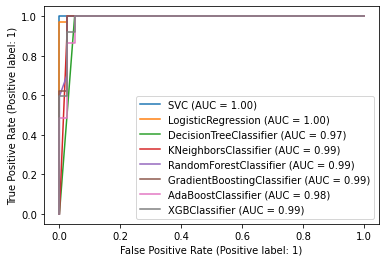

In [121]:
disp=plot_roc_curve(svc,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(dt,x_test,y_test,ax=disp.ax_)
plot_roc_curve(knc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gbc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(ada,x_test,y_test,ax=disp.ax_)
plot_roc_curve(xgb,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show()

In [123]:
#observations:
# Choosing SVC classifier  as the Best model
# as the Training score is 98.2% and and the testscore is 98.7%
# saving the model with SVC Classifier 

In [124]:
import pickle                                               # MODEL SAVING.
filename='Glass_identification.pkl'
pickle.dump(svc,open(filename,'wb'))

In [125]:
                           # CONCLUSION

In [126]:
import numpy as np

In [128]:
loaded_model=pickle.load(open('Glass_identification.pkl','rb'))
prediction=loaded_model.predict(x_test)

In [129]:
a=np.array(y_test)
predicted=np.array(prediction)
df.conclusion=pd.DataFrame({'Actual':a,'predicted':predicted})
df.conclusion

,Actual,predicted
0,1,1
1,0,0
2,1,1
3,1,1
4,0,0
...,...,...
72,0,0
73,0,0
74,0,0
75,0,0
